# Increasing Employee Retention
In this analysis, we aim to apply unsupervised learning techniques (K-Means Clustering and Principal Component Analysis) to segment employees within a medium-sized software company. By analyzing the company's employee data—covering demographics, performance, tenure, and attrition—we will identify distinct employee segments. The goal is to explore these segments and recommend strategies to enhance employee retention.

## About the Dataset
The dataset used in this analysis is the HR Analytics fictional employee database, which contains employee information such as demographic info, performance history, tenure at the company and attrition. 

This dataset is available from Maven Analytics, as part of the course "Data Science in Python: Unsupervised Learning".

## Data Dictionary
| Column Name         | Description                                                   |
|---------------------|---------------------------------------------------------------|
| `EmployeeID`        | Unique identifier for each employee.                          |
| `Age`               | Age of the employee.                                          |
| `Gender`            | Gender of the employee (e.g., Male, Female).                  |
| `DistanceFromHome`  | Distance the employee lives from the workplace (in units).    |
| `JobLevel`          | Job level or position rank of the employee within the company (1 to 5). |
| `Department`        | Department where the employee works (e.g., Sales, R&D).       |
| `MonthlyIncome`     | Monthly income of the employee (in dollars).                  |
| `PerformanceRating` | Performance rating of the employee (3 or 4).                  |
| `JobSatisfaction`   | Job satisfaction rating of the employee (1 to 4).             |
| `Attrition`         | Whether the employee has left the company ("Yes" or "No").    |


## Notebook Sections
The notebook is divided into 7 parts.
1. **Data Prep:** Load and preprocess the employee data.
1. **K-Means Clustering:** Identify patterns and group employees into clusters based on their features.
1. **PCA:** Reduce the dimensionality of the dataset and visualize it in 2D spaces.
1. **K-Means Clustering - No Departments:** Re-cluster the data after removing department-related features.
1. **PCA - No Departments:** Reduce the dimensionality and visualize the dataset without department-related features.
1. **EDA on Clusters:** Explore and analyze the characteristics of each cluster.
1. **Conclusion:** Identify key insights and at-risk groups based on clustering analysis.

# 1. Data Prep

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Check Data Types

In [2]:
# Load the employee data from a CSV file into a pandas DataFrame.
employee_data = pd.read_csv('../Data/employee_data.csv')
employee_data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [3]:
# Check the shape of the DataFrame (number of rows and columns)
employee_data.shape

(1470, 10)

In [4]:
# Get a summary of the DataFrame (non-null counts and data types)
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [5]:
# Identify columns in the DataFrame that have an integer data type
employee_data.dtypes[employee_data.dtypes == 'int64']

EmployeeID           int64
Age                  int64
DistanceFromHome     int64
JobLevel             int64
MonthlyIncome        int64
PerformanceRating    int64
JobSatisfaction      int64
dtype: object

In [6]:
# Identify columns in the DataFrame that do not have an integer data type
employee_data.dtypes[employee_data.dtypes != 'int64']

Gender        object
Department    object
Attrition     object
dtype: object

## Convert Data Types

In [7]:
# Create a copy of the DataFrame to avoid modifying the original data
data = employee_data.copy()
data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [8]:
# Count the occurrences of each category in the 'Gender' column
data.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [9]:
# Convert the 'Gender' column to binary values: 1 for 'Female', 0 for 'Male'
data.Gender = np.where(data.Gender == 'Female', 1, 0)
data.Gender.head()

0    1
1    0
2    0
3    1
4    0
Name: Gender, dtype: int32

In [10]:
# Count the occurrences of each category in the 'Attrition' column
data.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
# Convert the 'Attrition' column to binary values: 1 for 'Yes', 0 for 'No'
data.Attrition = np.where(data.Attrition == 'Yes', 1, 0)
data.Attrition.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [12]:
# Count the occurrences of each category in the 'Department' column
data.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [13]:
# Create dummy/one-hot encoded variables for the 'Department' column and display the first few rows
pd.get_dummies(data.Department).astype('int').head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [14]:
# Concatenate the dummy variables with the main DataFrame and drop the original 'Department' column
data = pd.concat([data, pd.get_dummies(data.Department).astype('int')], axis=1)
data.drop('Department', axis=1, inplace=True)
data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0


In [15]:
# Inspect DataFrame after modifications
data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0


In [16]:
# Check the shape of the DataFrame after modifications
data.shape

(1470, 12)

## Exploratory Data Analysis
The objective is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [17]:
# Calculate the mean of the 'Attrition' column (proportion of employees with attrition)
data.Attrition.mean()

0.16122448979591836

In [18]:
# Group the DataFrame by 'Attrition' and calculate the mean for each group (useful for comparing attributes)
data.groupby('Attrition').mean()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
Attrition,,,,,,,,,,,
0,2027.656123,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,2010.345992,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


**INSIGHT** 
-  People who stay tend to be older, female, live close by, more senior, are happy with their jobs and work in research & development.

## Remove Attrition and ID Columns

In [19]:
# Create a new DataFrame 'df' by dropping the 'Attrition' column from the data (for further analysis without the target variable)
df = data.drop('Attrition', axis=1)
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,0,0,1
1,1002,49,0,8,2,5130,4,2,0,1,0
2,1004,37,0,2,1,2090,3,3,0,1,0
3,1005,33,1,3,1,2909,3,3,0,1,0
4,1007,27,0,2,1,3468,3,2,0,1,0


In [20]:
# Drop the 'EmployeeID' column from 'df' as it is not relevant for analysis
df = df.drop(columns='EmployeeID')
df.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0


In [21]:
# Check the shape of the 'df' DataFrame after dropping columns
df.shape

(1470, 10)

C:\Users\aojrz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


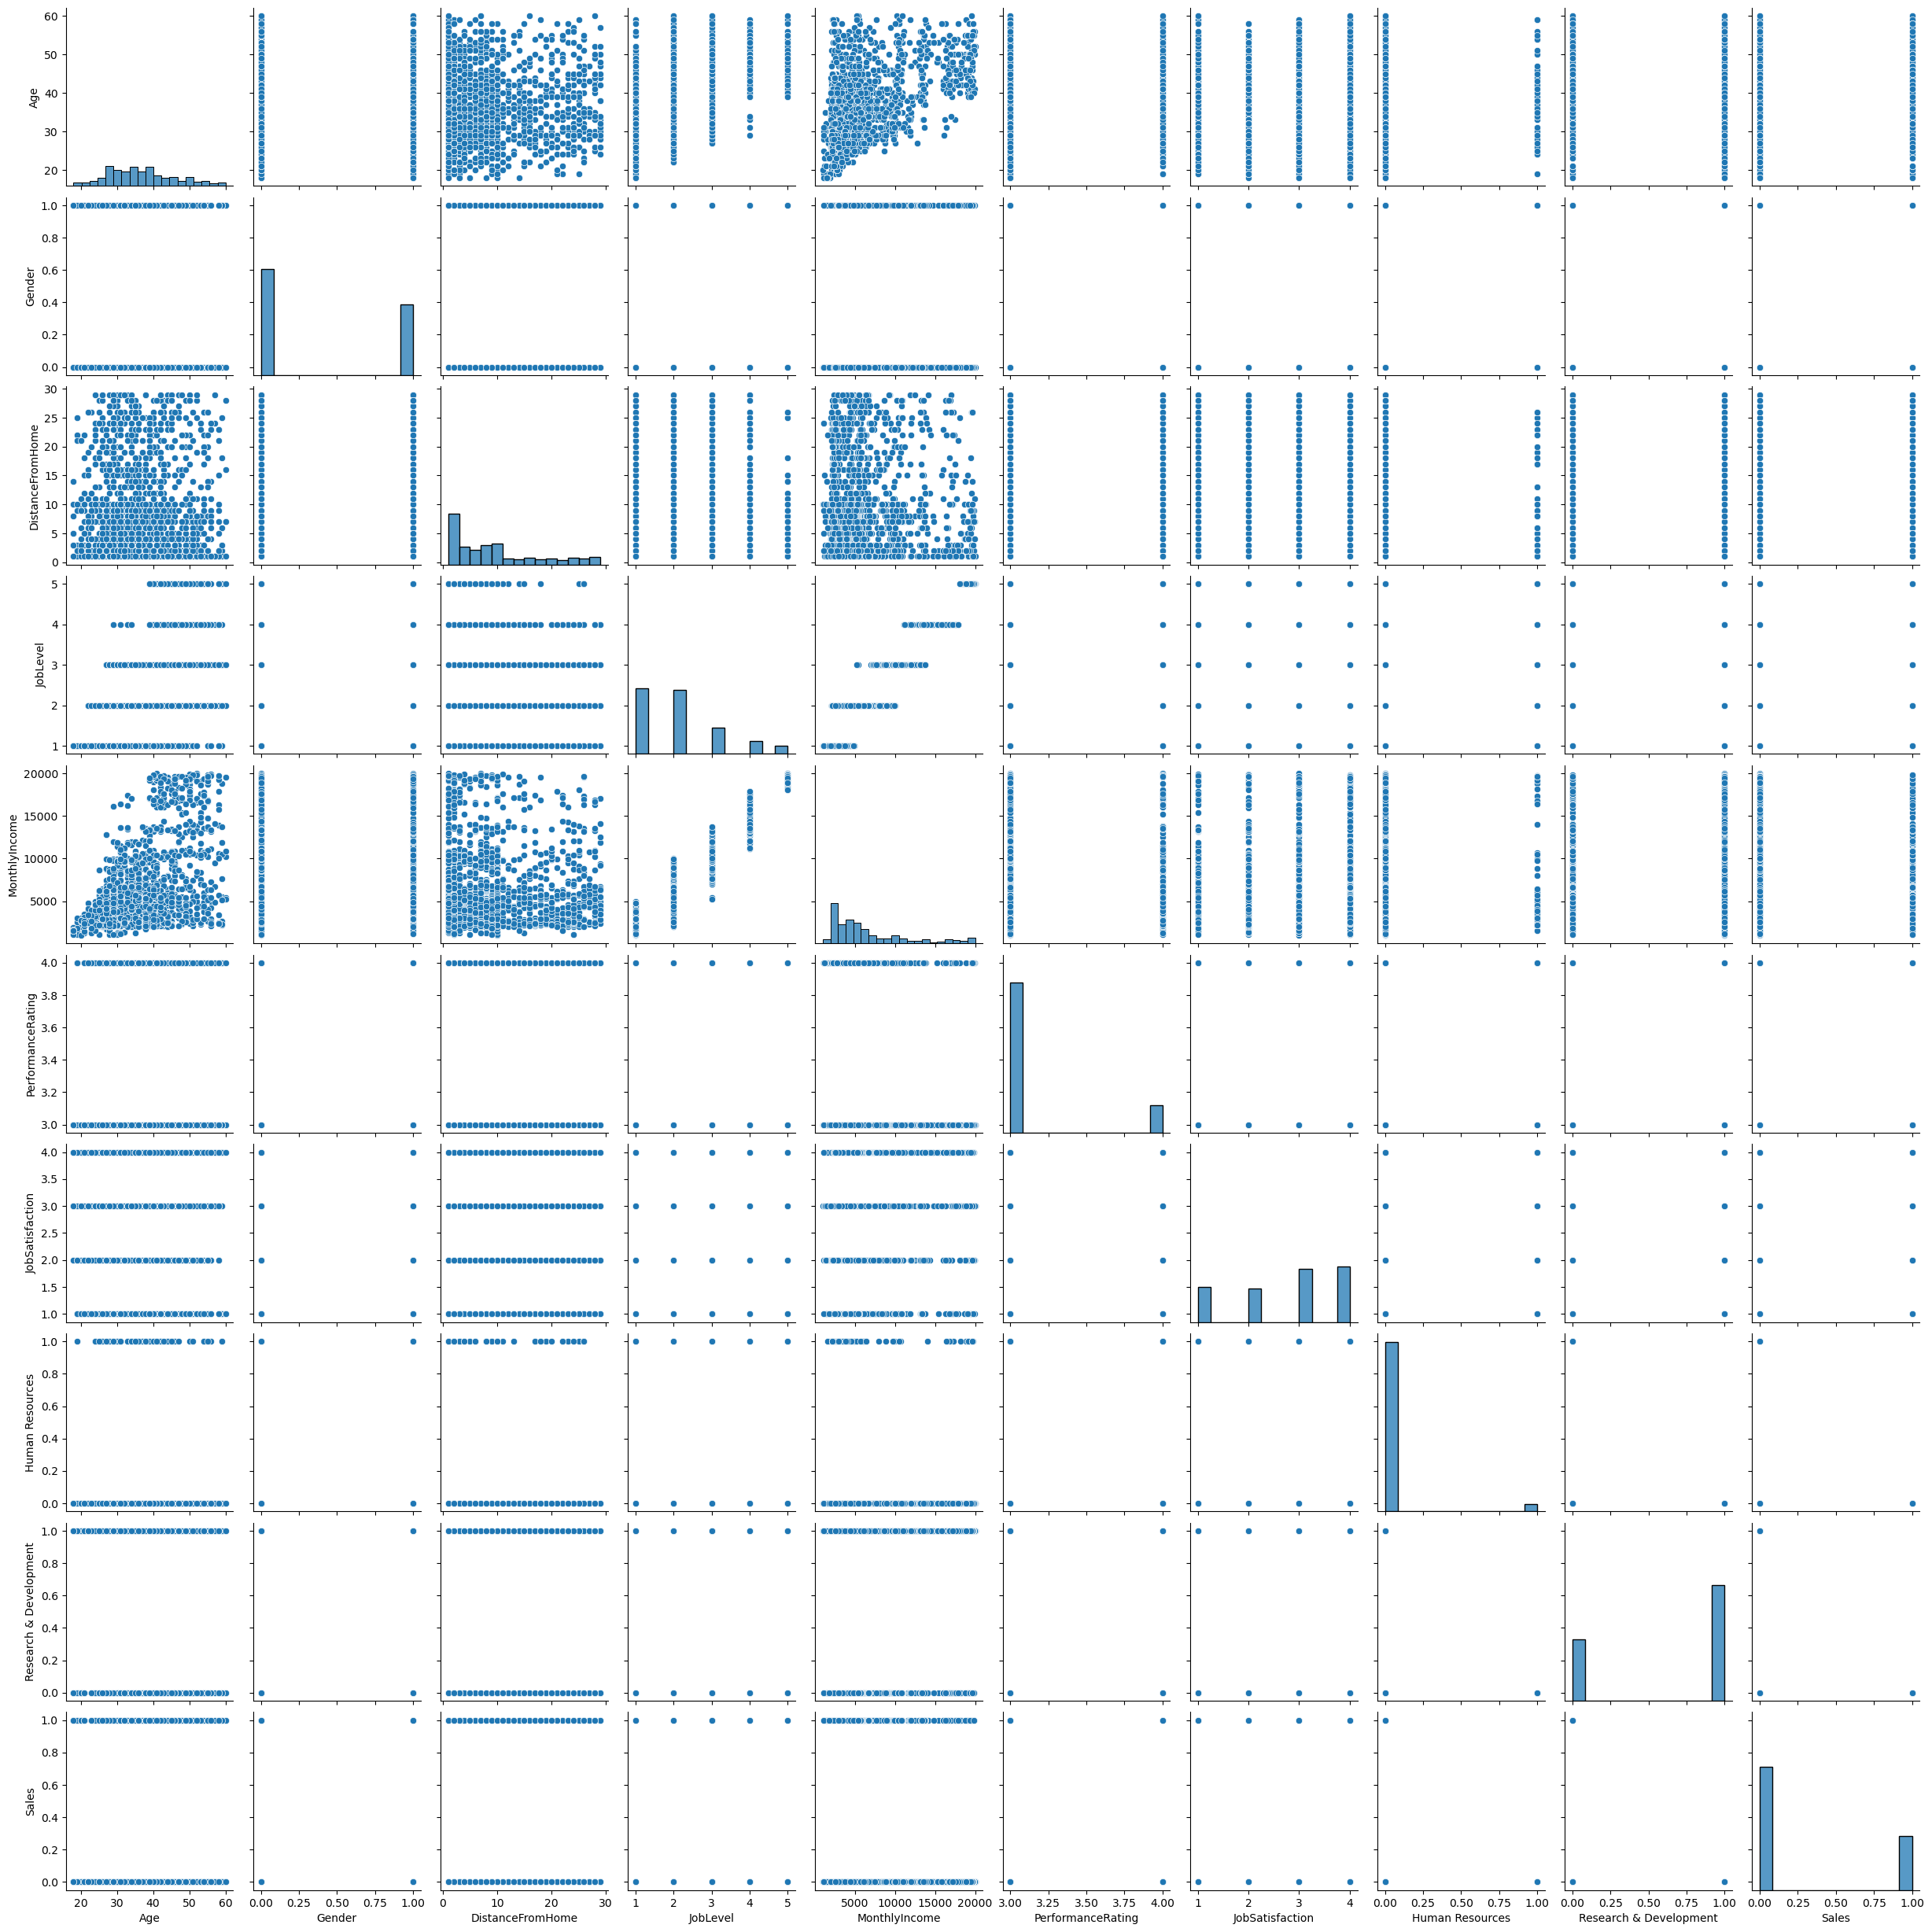

In [22]:
# Create pairplots of all variables in the 'df' DataFrame to visualize relationships between them
sns.pairplot(df);

**OBSERVATIONS**

-  Age and gender seem to be pretty evenly distributed
-  More people live closer to the office
-  Job level and income are correlated
-  There are fewer high performers
-  Most people are happy with the jobs
-  There are few people in HR compared to the other departments

# 2. K-Means Clustering

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

## Standardize the Data

In [24]:
# Initialize the StandardScaler to normalize the features to have mean=0 and variance=1
scaler = StandardScaler()

# Fit the scaler to the data and transform the features, storing the scaled data in a new DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960


In [25]:
# Display summary statistics of the scaled data to verify the scaling process
df_scaled.describe()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-4.350262e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-8.164966e-01,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.164966e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-8.164966e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,1.224745e+00,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,1.224745e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,4.725816e+00,7.277751e-01,1.515244e+00


## Fit Models with 2 to 15 Clusters and Record Inertia & Silhouette Scores

In [26]:
# Initialize empty lists to store inertia values and silhouette scores for different numbers of clusters
inertia_values = []
silhouette_scores = []

# Iterate over a range of cluster numbers (k) to find the optimal number of clusters
for k in range(2, 16):
    # Initialize the KMeans algorithm with k clusters and fit it to the scaled data
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # n_init changed to 10 to ensure stability
    kmeans.fit(df_scaled)
    
    # Append the inertia (sum of squared distances to the nearest cluster center) to the inertia_values list
    inertia_values.append(kmeans.inertia_)
    
    # Compute the silhouette score (measure of how similar an object is to its own cluster compared to others)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

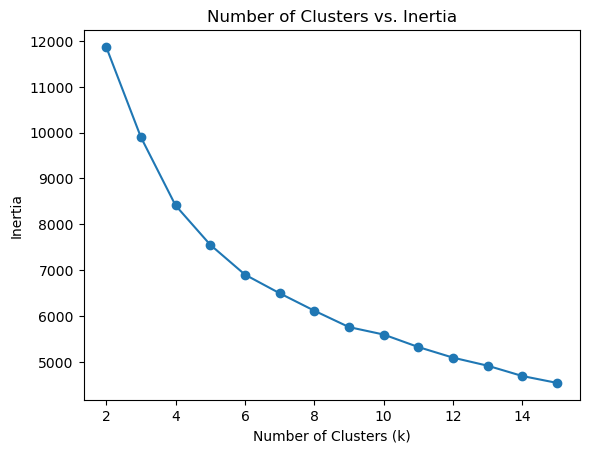

In [27]:
# Convert the list of inertia values to a pandas Series for easier plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# Plot the inertia values against the number of clusters (k) to observe the "elbow" point
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

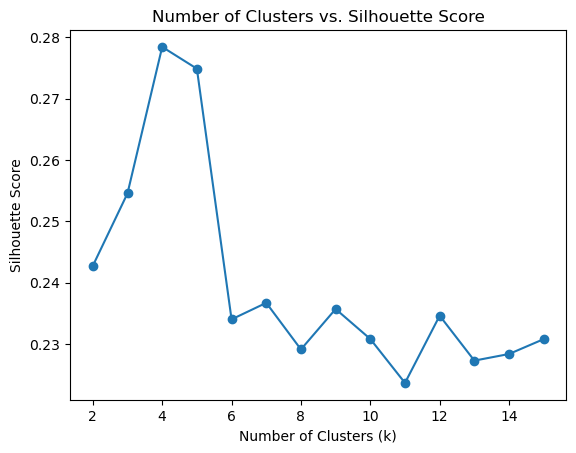

In [28]:
# Convert the list of silhouette scores to a pandas Series for easier plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# Plot the silhouette scores against the number of clusters (k) to observe the optimal number of clusters
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

## Find Optimal k with Elbow in Inertia Plot and High Silhouette Score

In [29]:
# Choose k=4 based on the above analysis and fit the KMeans algorithm with 4 clusters
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [30]:
# Use Counter to count the number of data points in each cluster
Counter(kmeans4.labels_)

Counter({0: 747, 1: 407, 2: 253, 3: 63})

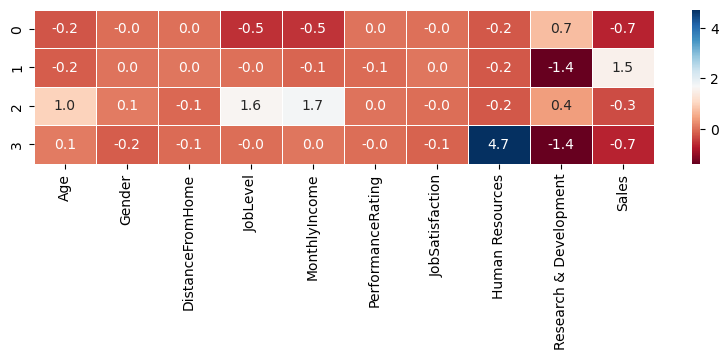

In [31]:
# Extract the cluster centers and convert them into a DataFrame for better readability
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=df_scaled.columns)

# Plot a heatmap of the cluster centers to visualize the mean feature values in each cluster
plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

**Interpret the clusters**

-  Cluster 0: junior, research & dev employees
-  Cluster 1: sales employees
-  Cluster 2: senior employees
-  Cluster 3: HR employees

# 3. PCA

In [32]:
from sklearn.decomposition import PCA

## Fit a 2-Component PCA for Visualization

In [33]:
# Initialize PCA with the number of components to keep, in this case, 2 for a 2D representation
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data to identify the principal components
pca.fit(df_scaled)

PCA(n_components=2)

In [34]:
# Display the percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([0.23793893, 0.18883434])

In [35]:
# Show the principal components and their loadings for each feature
pca.components_

array([[ 0.43287352,  0.04877625, -0.00285089,  0.60509274,  0.59445012,
        -0.02556521, -0.00472736,  0.02964393, -0.21392918,  0.20833797],
       [-0.21384802,  0.00840873,  0.01653328, -0.14533326, -0.17730123,
        -0.04153184,  0.01140416,  0.11374447, -0.67887246,  0.65246219]])

In [36]:
# Display the original feature names for reference
df_scaled.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction', 'Human Resources',
       'Research & Development', 'Sales'],
      dtype='object')

**Interpret the components**

-  Component 1: higher age, job level, monthly income = more senior
-  Component 2: lower = research, higher = sales

## Overlay the K-Means cluster colors

In [37]:
# Transform the scaled data into the 2D space defined by the first two principal components
df_scaled_transformed = pd.DataFrame(pca.transform(df_scaled), columns=['PC1', 'PC2'])
df_scaled_transformed.head()

,PC1,PC2
0,0.765263,1.853973
1,-0.031684,-1.285674
2,-1.462588,-0.645564
3,-1.449531,-0.563547
4,-1.758252,-0.473654


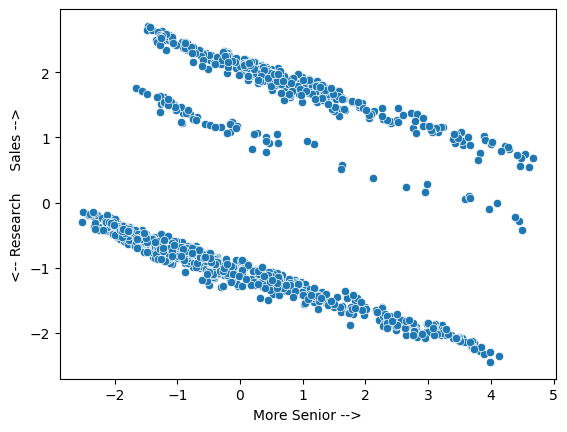

In [38]:
# Plot a scatterplot of the data points in the new 2D PCA space
sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed)
plt.xlabel('More Senior -->') # Label for the first principal component axis, indicating the direction of seniority
plt.ylabel('<-- Research     Sales -->'); # Label for the second principal component axis, indicating departments

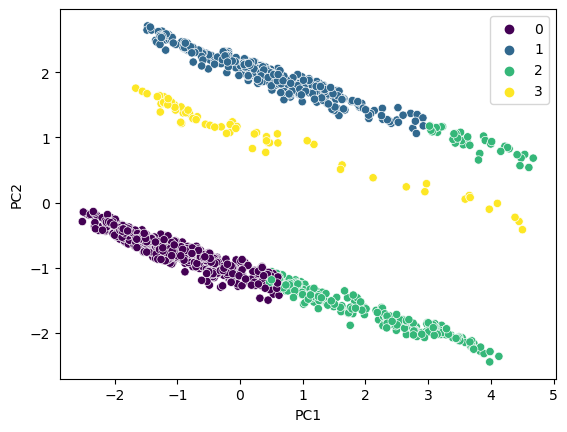

In [39]:
# Plot the data points in the PCA space, colored by the cluster labels from KMeans
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=kmeans4.labels_, palette='viridis');

## Overlay the Department colors instead

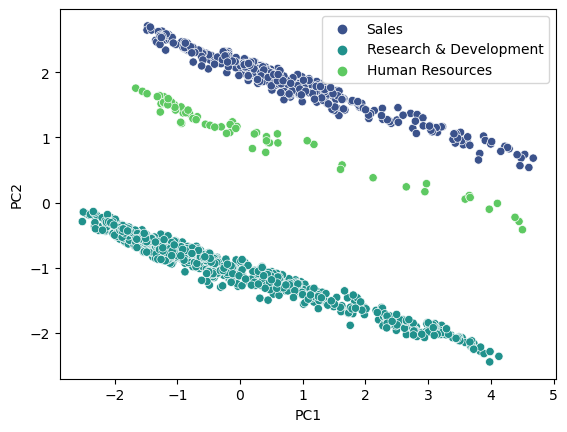

In [40]:
# Plot the data points in the PCA space, colored by the original departments for comparison
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=employee_data.Department, palette='viridis')

plt.legend(loc='upper right');

# 4. K-Means Clustering - No Departments
The departments dominate the visualization, will exclude them and try fitting more K-Means models.

## Create a new dataframe without the Departments

In [41]:
# Create a new dataframe that excludes the three department columns from the scaled dataframe
df_scaled_v2 = df_scaled.iloc[:, :7]
df_scaled_v2.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853


## Fit Models with 2 to 15 Clusters and Record Inertia & Silhouette Scores

In [42]:
# Initialize empty lists to store inertia values and silhouette scores for different numbers of clusters (k)
inertia_values_v2 = []
silhouette_scores_v2 = []

# Iterate over a range of cluster numbers (k) to find the optimal number of clusters for the subset of features
for k in range(2, 16):
    # Initialize the KMeans algorithm with k clusters and fit it to the scaled data subse
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # n_init set to 10 for consistent clustering
    kmeans.fit(df_scaled_v2)
    
    # Append the inertia (sum of squared distances to the nearest cluster center) to the inertia_values_v2 list
    inertia_values_v2.append(kmeans.inertia_)
    
    # Compute and store the silhouette score (how well clusters are separated) for each k
    silhouette_scores_v2.append(silhouette_score(df_scaled_v2, kmeans.labels_, metric='euclidean', sample_size=None))

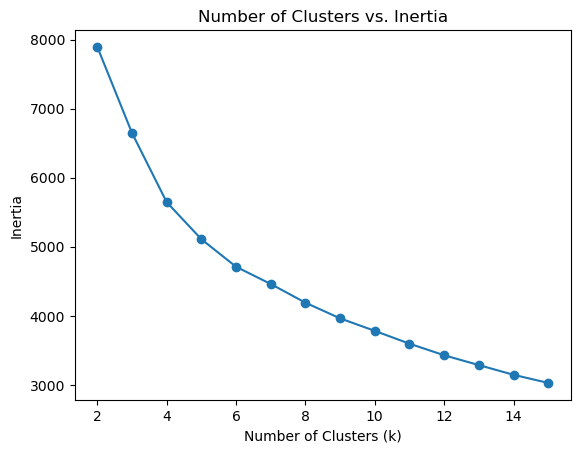

In [43]:
# Convert the list of inertia values to a pandas Series for easier plotting
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2, 16))

# Plot the inertia values against the number of clusters (k) to observe the "elbow" point for the subset
inertia_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

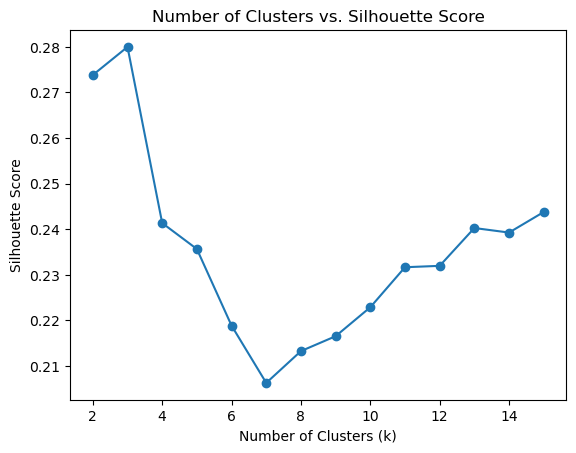

In [44]:
# Convert the list of silhouette scores to a pandas Series for easier plotting
silhouette_series_v2 = pd.Series(silhouette_scores_v2, index=range(2, 16))

# Plot the silhouette scores against the number of clusters (k) to identify the optimal number of clusters
silhouette_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

## Identify a few Optimal k Values with Elbows in Inertia Plot and High Silhouette Scores

### k value: 3

In [45]:
# Perform KMeans clustering with 3 clusters on the subset of features
kmeans3_v2 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans3_v2.fit(df_scaled_v2)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [46]:
# Use Counter to count the number of data points in each cluster for k=3
Counter(kmeans3_v2.labels_)

Counter({1: 988, 2: 282, 0: 200})

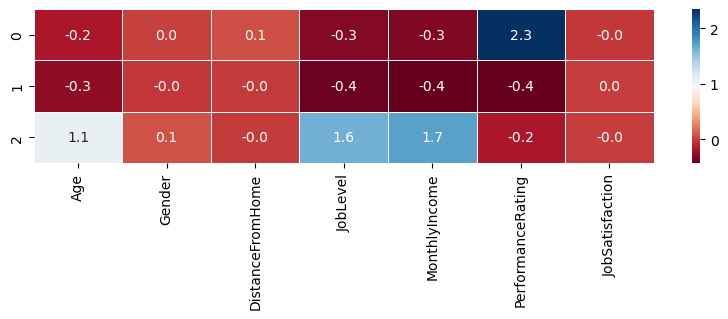

In [47]:
# Extract the cluster centers for k=3 and convert them to a DataFrame for visualization
cluster_centers3_v2 = pd.DataFrame(kmeans3_v2.cluster_centers_, columns=df_scaled_v2.columns)

# Plot a heatmap of the cluster centers for k=3 to visualize the feature values in each cluster
plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers3_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

**Interpret the clusters**

-  Cluster 0: high performing employees
-  Cluster 1: junior, low performing employees
-  Cluster 2: senior employees

### k value: 4

In [48]:
# Perform KMeans clustering with 4 clusters on the subset of features
kmeans4_v2 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4_v2.fit(df_scaled_v2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [49]:
# Use Counter to count the number of data points in each cluster for k=4
Counter(kmeans4_v2.labels_)

Counter({2: 616, 0: 405, 1: 249, 3: 200})

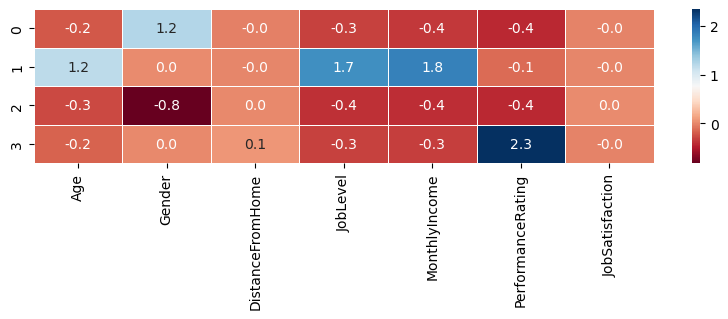

In [50]:
# Extract the cluster centers for k=4 and convert them to a DataFrame for visualization
cluster_centers4_v2 = pd.DataFrame(kmeans4_v2.cluster_centers_, columns=df_scaled_v2.columns)

# Plot a heatmap of the cluster centers for k=4 to visualize the feature values in each cluster
plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

**Interpret the clusters**
-  Cluster 0: female employees
-  Cluster 1: senior employees
-  Cluster 2: male employees
-  Cluster 3: high performing employees

### k value: k-6

In [51]:
# Perform KMeans clustering with 6 clusters on the subset of features
kmeans6_v2 = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans6_v2.fit(df_scaled_v2)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [52]:
# Use Counter to count the number of data points in each cluster for k=6
Counter(kmeans6_v2.labels_)

Counter({3: 349, 0: 304, 4: 219, 5: 201, 1: 200, 2: 197})

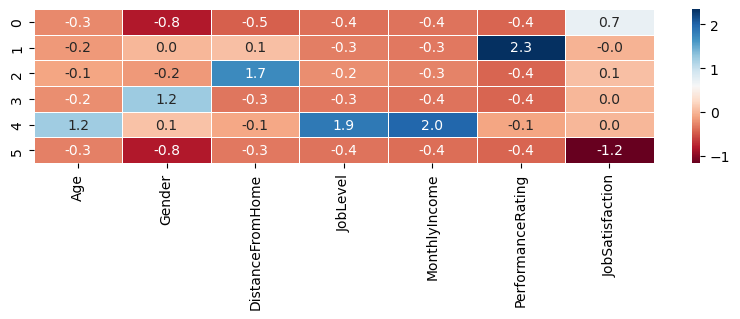

In [53]:
# Extract the cluster centers for k=6 and convert them to a DataFrame for visualization
cluster_centers6_v2 = pd.DataFrame(kmeans6_v2.cluster_centers_, columns=df_scaled_v2.columns)

# Plot a heatmap of the cluster centers for k=6 to visualize the feature values in each cluster
plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers6_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

**Interpret the clusters**

-  Cluster 0: men who like their jobs
-  Cluster 1: high performers
-  Cluster 2: long commuters
-  Cluster 3: women
-  Cluster 4: senior employee
-  Cluster 5: men who dislike their jobs

# 5. PCA - No Departments
Visualize the data (without Departments) using PCA.

In [54]:
from mpl_toolkits.mplot3d import Axes3D

## Fit a 2-Component PCA for Visualization

In [55]:
# Perform PCA on the selected 7 features to reduce the dimensionality to 2 components
pca_v2 = PCA(n_components=2)
pca_v2.fit(df_scaled_v2)

PCA(n_components=2)

In [56]:
# Display the percentage of variance explained by the two principal components
pca_v2.explained_variance_ratio_ 

array([0.33354222, 0.14850324])

In [57]:
# Show the principal components (eigenvectors) and their loadings for each feature
pca_v2.components_

array([[ 0.47124275,  0.0460627 , -0.00629691,  0.62393147,  0.62140377,
        -0.01687984, -0.00712661],
       [ 0.01896906,  0.58615904,  0.41405416, -0.01838822, -0.02778096,
         0.4833175 , -0.49991119]])

In [58]:
# Display the original feature names for reference
df_scaled_v2.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

**Interpret the components**

-  Component 1: higher age, job level, monthly income = more senior
-  Component 2: <-- happy in job | women, longer commute, higher perfomring -->

## Overlay the K-Means cluster colors

In [59]:
# Transform the scaled data into the 2D space defined by the first two principal components
df_scaled_transformed_v2 = pd.DataFrame(pca_v2.transform(df_scaled_v2), columns=['PC1', 'PC2'])
df_scaled_transformed_v2.head()

,PC1,PC2
0,0.168712,-0.470665
1,0.334248,0.959030
2,-1.205213,-1.131272
3,-1.210236,0.103169
4,-1.532824,-0.706731


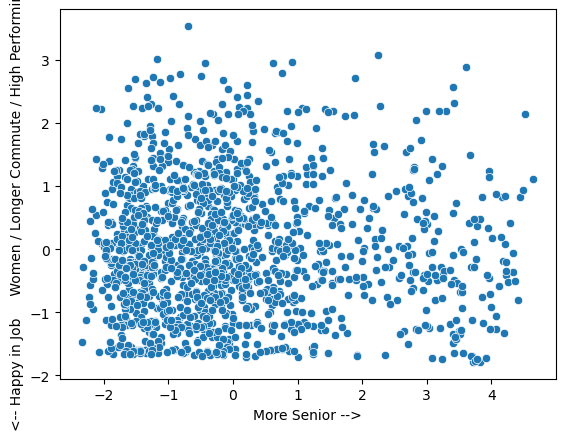

In [60]:
# Plot a scatterplot of the data points in the new 2D PCA space for initial visualization
sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed_v2)
plt.xlabel('More Senior -->') # Label for the first principal component axis, indicating direction of seniority
plt.ylabel('<-- Happy in Job     Women / Longer Commute / High Performing -->'); # Label for the second component

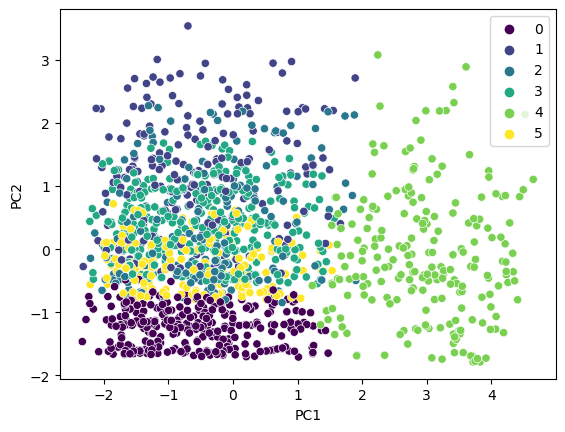

In [61]:
# Plot the data points in the PCA space, colored by the cluster labels from the 6-cluster KMeans
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed_v2, hue=kmeans6_v2.labels_, palette='viridis');

# 6. EDA on Clusters
Choosing to focus on 6 clusters without department data.

## Confirm 6 clusters

In [62]:
# Display the KMeans model object to review its parameters and settings. Confirm its 6 clusters.
kmeans6_v2

KMeans(n_clusters=6, n_init=10, random_state=42)

In [63]:
# Access the cluster labels assigned by the KMeans model
kmeans6_v2.labels_

array([3, 1, 0, ..., 1, 5, 0])

## Create a dataframe with cluster labels and names

In [64]:
# Create a DataFrame to store the cluster labels, with a column named 'Cluster'
clusters = pd.DataFrame(kmeans6_v2.labels_, columns=['Cluster'])
clusters.head()

,Cluster
0,3
1,1
2,0
3,3
4,5


In [65]:
# Define a mapping of cluster numbers to descriptive cluster names
cluster_mapping = {0: 'Men who like their jobs',
                   1: 'High performers',
                   2: 'Long commuters',
                   3: 'Female employees',
                   4: 'Senior employees',
                   5: 'Men who dislike their jobs'}

In [66]:
# Map the cluster numbers to the descriptive names using the mapping dictionary
clusters['Cluster_Name'] = clusters['Cluster'].map(cluster_mapping)
clusters.head()

,Cluster,Cluster_Name
0,3,Female employees
1,1,High performers
2,0,Men who like their jobs
3,3,Female employees
4,5,Men who dislike their jobs


## View Attrition Rates for each Cluster

In [67]:
# Concatenate the 'Attrition' data from the original dataset to the 'clusters' DataFrame
clusters = pd.concat([clusters, data.Attrition], axis=1)
clusters.head()

,Cluster,Cluster_Name,Attrition
0,3,Female employees,1
1,1,High performers,0
2,0,Men who like their jobs,1
3,3,Female employees,0
4,5,Men who dislike their jobs,0


In [68]:
# Calculate the mean attrition rate for each cluster to understand attrition trends by cluster
clusters.groupby(['Cluster_Name'])['Attrition'].mean()

Cluster_Name
Female employees              0.154728
High performers               0.185000
Long commuters                0.218274
Men who dislike their jobs    0.189055
Men who like their jobs       0.161184
Senior employees              0.073059
Name: Attrition, dtype: float64

In [69]:
# Sort the clusters by attrition rate in descending order to identify clusters with the highest attrition
clusters.groupby(['Cluster_Name'])['Attrition'].mean().sort_values(ascending=False)

Cluster_Name
Long commuters                0.218274
Men who dislike their jobs    0.189055
High performers               0.185000
Men who like their jobs       0.161184
Female employees              0.154728
Senior employees              0.073059
Name: Attrition, dtype: float64

**Findings**

-  Long commuters are most likely to leave
-  Senior employees are most likely to stay

In [70]:
# Count the number of data points (employees) in each cluster to understand the cluster distribution
clusters.Cluster.value_counts()

Cluster
3    349
0    304
4    219
5    201
1    200
2    197
Name: count, dtype: int64

## View Department Breakdown by Cluster

In [71]:
# Concatenate the 'Department' data from the original dataset to the 'clusters' DataFrame
clusters = pd.concat([clusters, employee_data.Department], axis=1)
clusters.head()

,Cluster,Cluster_Name,Attrition,Department
0,3,Female employees,1,Sales
1,1,High performers,0,Research & Development
2,0,Men who like their jobs,1,Research & Development
3,3,Female employees,0,Research & Development
4,5,Men who dislike their jobs,0,Research & Development


In [72]:
# Calculate the mean values of all numerical columns, grouped by cluster name and department
clusters.groupby(['Cluster_Name', 'Department']).mean()

Cluster  Attrition
Cluster_Name               Department                                
Female employees           Human Resources             3.0   0.300000
                           Research & Development      3.0   0.121076
                           Sales                       3.0   0.206897
High performers            Human Resources             1.0   0.142857
                           Research & Development      1.0   0.188406
                           Sales                       1.0   0.181818
Long commuters             Human Resources             2.0   0.666667
                           Research & Development      2.0   0.153846
                           Sales                       2.0   0.311475
Men who dislike their jobs Human Resources             5.0   0.214286
                           Research & Development      5.0   0.172131
                           Sales                       5.0   0.215385
Men who like their jobs    Human Resources             0.0   0.071429
                           Research & Development      0.0   0.152284
                           Sales                       0.0   0.193548
Senior employees           Human Resources             4.0   0.000000
                           Research & Development      4.0   0.059603
                           Sales                       4.0   0.125000

In [73]:
# Sort the grouped means by attrition rate in descending order to identify department-cluster combinations with high attrition
clusters.groupby(['Cluster_Name', 'Department']).mean().sort_values('Attrition', ascending=False)

Cluster  Attrition
Cluster_Name               Department                                
Long commuters             Human Resources             2.0   0.666667
                           Sales                       2.0   0.311475
Female employees           Human Resources             3.0   0.300000
Men who dislike their jobs Sales                       5.0   0.215385
                           Human Resources             5.0   0.214286
Female employees           Sales                       3.0   0.206897
Men who like their jobs    Sales                       0.0   0.193548
High performers            Research & Development      1.0   0.188406
                           Sales                       1.0   0.181818
Men who dislike their jobs Research & Development      5.0   0.172131
Long commuters             Research & Development      2.0   0.153846
Men who like their jobs    Research & Development      0.0   0.152284
High performers            Human Resources             1.0   0.142857
Senior employees           Sales                       4.0   0.125000
Female employees           Research & Development      3.0   0.121076
Men who like their jobs    Human Resources             0.0   0.071429
Senior employees           Research & Development      4.0   0.059603
                           Human Resources             4.0   0.000000

**Interpret the findings**

-  The groups most likely to leave are people with long commutes, women in HR and those in HR and sales
-  The groups most likely NOT to leave are senior employees, men who like their jobs and those in research and development

In [74]:
# Count the number of employees in each cluster-department combination to understand their distribution
clusters.groupby(['Cluster_Name', 'Department']).count()

Cluster  Attrition
Cluster_Name               Department                                
Female employees           Human Resources              10         10
                           Research & Development      223        223
                           Sales                       116        116
High performers            Human Resources               7          7
                           Research & Development      138        138
                           Sales                        55         55
Long commuters             Human Resources               6          6
                           Research & Development      130        130
                           Sales                        61         61
Men who dislike their jobs Human Resources              14         14
                           Research & Development      122        122
                           Sales                        65         65
Men who like their jobs    Human Resources              14         14
                           Research & Development      197        197
                           Sales                        93         93
Senior employees           Human Resources              12         12
                           Research & Development      151        151
                           Sales                        56         56

# 7. Conclusion

In [75]:
# Calculate the mean attrition rate for each cluster and sort the clusters by attrition rate in descending order
clusters.groupby(['Cluster_Name'])['Attrition'].mean().sort_values(ascending=False)

Cluster_Name
Long commuters                0.218274
Men who dislike their jobs    0.189055
High performers               0.185000
Men who like their jobs       0.161184
Female employees              0.154728
Senior employees              0.073059
Name: Attrition, dtype: float64

Based on the analysis conducted, several key findings have emerged regarding employee attrition within the company, detailed below.

## Key Findings

### Higher Attrition Groups:

-  **Long Commuters:** Employees with long commutes show a higher rate of attrition. This suggests a need to explore remote work options or create a more inclusive remote culture. Implementing flexible work arrangements could help retain these employees by reducing the burden of commuting.

-  **Men Who Dislike Their Jobs:** This group also exhibits a high attrition rate. It is recommended that managers engage in one-on-one conversations with these employees to better understand their concerns and find ways to improve their job satisfaction. Addressing the issues contributing to their dissatisfaction could significantly reduce turnover in this group.

-  **High Performers:** Interestingly, high-performing employees are more likely to leave, possibly due to a lack of growth opportunities. Providing pathways for career advancement, such as offering more senior positions or leadership roles, could help retain top talent.


### Lower Attrition Groups:

-  **Senior Employees:** As expected, senior employees, who have been with the company for a long time, show lower attrition rates. This stability is likely due to their deep connection with the company and its culture. However, it's important to continue recognizing their contributions and providing opportunities for mentorship or leadership roles to keep them engaged.

-  **Female Employees:** The lower attrition rate among female employees is an intriguing finding. It warrants further investigation to understand the factors contributing to their higher retention rates. Insights from this analysis could be used to implement strategies that benefit other demographic groups as well.

-  **Men Who Like Their Jobs:** As anticipated, employees who report liking their jobs tend to stay longer. This reinforces the importance of job satisfaction as a key driver of retention. Ensuring that employees feel valued and fulfilled in their roles is crucial for maintaining a low attrition rate across the organization.

## Recommendations
-  **Remote Work Initiatives:** Implement or expand remote work options, particularly targeting employees with long commutes.
-  **Managerial Engagement:** Encourage managers to have regular check-ins with employees, especially those who are dissatisfied, to identify and address potential issues early on.
-  **Career Development:** Create clear pathways for career progression, particularly for high performers, to keep them motivated and engaged.
-  **Further Analysis:** Conduct deeper analysis to understand the reasons behind the lower attrition rates among female employees, which could inform broader retention strategies.